In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./Datasets/NYPD_Complaint_Data_Historic.csv')

<ipython-input-3-63ade1bd11fc>:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Datasets/NYPD_Complaint_Data_Historic.csv')


In [4]:
len(df['ADDR_PCT_CD'].unique())

78

In [5]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


In [6]:
len(df)

7825499

## Preprocessing

In [8]:
# remove the violate type of crime
df1 = df[df['LAW_CAT_CD']!='VIOLATION']
len(df1)

6790052

In [10]:
# keep the records that have start and end time
df_w_time = df1[df1['CMPLNT_TO_DT'].notna()]
len(df_w_time)

5332432

In [40]:
# keep the records that have susp_sex
df_w_sex = df_w_time[df_w_time['SUSP_SEX'].notna()]
len(df_w_sex)

2586421

In [61]:
df_final = df_w_sex
df_final['CMPLNT_TO_TM'] = df_final['CMPLNT_TO_TM'].replace('24:00:00','00:00:00')
# df_final = df_final['CMPLNT_FR_TM'].replace('24:00:00','00:00:00')

<ipython-input-61-c38446128228>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CMPLNT_TO_TM'] = df_final['CMPLNT_TO_TM'].replace('24:00:00','00:00:00')


In [64]:
df_final['CMPLNT_FR_TM'] = df_final['CMPLNT_FR_TM'].replace('24:00:00','00:00:00')

<ipython-input-64-354e68c35694>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CMPLNT_FR_TM'] = df_final['CMPLNT_FR_TM'].replace('24:00:00','00:00:00')


In [73]:
df_final['CMPLNT_FR_DT'] = df_final['CMPLNT_FR_DT'].replace('12/06/1019','12/06/2019')

<ipython-input-73-c92f15ed0208>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CMPLNT_FR_DT'] = df_final['CMPLNT_FR_DT'].replace('12/06/1019','12/06/2019')


In [76]:
# remove the rows that have typo
df_final = df_final[df_final['CMPLNT_TO_DT'] == df_final['CMPLNT_FR_DT']]
len(df_final)

2175013

In [82]:
df_final = df_final[df_final['CMPLNT_TO_DT'] == df_final['CMPLNT_FR_DT']]

In [83]:
pass_time = pd.to_datetime(df_final['CMPLNT_TO_DT'] + ' ' + df_final['CMPLNT_TO_TM']) - pd.to_datetime(df_final['CMPLNT_FR_DT'] + ' ' + df_final['CMPLNT_FR_TM'])
df_final['pass_time'] = pass_time
df_final.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,pass_time
11,916172359,12/21/2019,20:00:00,12/21/2019,20:30:00,25.0,12/24/2019,341,PETIT LARCENY,301.0,...,NaN,40.801684,-73.938959,"(40.80168405900002, -73.93895929199994)",PATROL BORO MAN NORTH,NaN,25-44,UNKNOWN,F,0 days 00:30:00
34,465522474,12/05/2019,22:00:00,12/05/2019,23:00:00,30.0,12/15/2019,233,SEX CRIMES,175.0,...,NaN,40.828851,-73.943834,"(40.82885104500008, -73.94383419099995)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F,0 days 01:00:00
43,903296937,12/12/2019,00:00:00,12/12/2019,02:19:00,48.0,12/12/2019,104,RAPE,157.0,...,NaN,40.843901,-73.900505,"(40.84390125500005, -73.900504632)",PATROL BORO BRONX,NaN,<18,BLACK HISPANIC,F,0 days 02:19:00
46,656309678,12/11/2019,02:00:00,12/11/2019,02:12:00,40.0,12/11/2019,105,ROBBERY,397.0,...,NaN,40.807198,-73.924299,"(40.80719775400007, -73.92429928699994)",PATROL BORO BRONX,NaN,18-24,UNKNOWN,M,0 days 00:12:00
48,178126093,12/10/2019,15:00:00,12/10/2019,15:40:00,40.0,12/10/2019,107,BURGLARY,231.0,...,NaN,40.819032,-73.918429,"(40.81903174100006, -73.91842930699994)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D,0 days 00:40:00


In [84]:
len(df_final)

2175013

In [105]:
# remove the records that are roughly timed, i.e. the escaping time is multiple of half hours

df_final_clear = df_final[df_final['pass_time'] // np.timedelta64(30,'m') *  np.timedelta64(30,'m') != df_final['pass_time']]

In [106]:
len(df_final_clear)

1725994

In [108]:
df_final_clear['pass_time'].head()

43    0 days 02:19:00
46    0 days 00:12:00
48    0 days 00:40:00
73    0 days 00:25:00
111   0 days 00:09:00
Name: pass_time, dtype: timedelta64[ns]

In [112]:
# keep the escape time that is less than one hour
df_final_clear = df_final_clear[df_final_clear['pass_time'] < np.timedelta64(60,'m')]

In [114]:
df_dataset = df_final_clear

In [115]:
df_c = df_dataset.iloc[:10000]

In [122]:
pass_time = pd.to_datetime(df_c['CMPLNT_TO_DT'] + ' ' + df_c['CMPLNT_TO_TM']) - pd.to_datetime(df_c['CMPLNT_FR_DT'] + ' ' + df_c['CMPLNT_FR_TM'])
pass_time_s = pass_time.apply(lambda x: x.seconds)

Text(0.5, 1.0, 'Escape time distribution after preprocessing \n (first 10k records).')

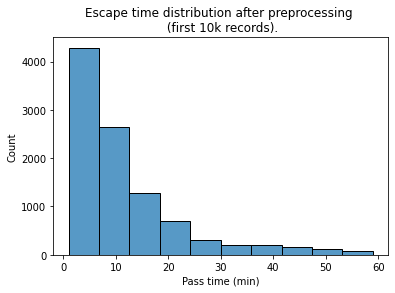

In [132]:
pass_time_withinhr = pass_time_s[pass_time_s<3600]/60
sns.histplot(pass_time_withinhr, bins=10)
plt.xlabel('Pass time (min)')
plt.title('Escape time distribution after preprocessing \n (first 10k records).')
# plt.xlim([0, 10000])


In [136]:
df_dataset.to_csv('./Datasets/dataset.csv',index=False)

Text(0.5, 0, 'Pass time (hr)')

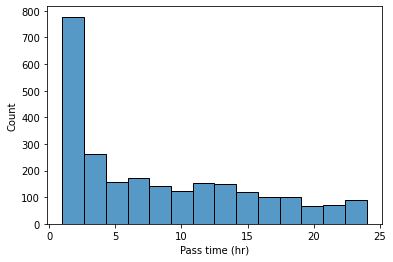

In [54]:
pass_time_outside = pass_time_s[pass_time_s>=3600] / 60 / 60
sns.histplot(pass_time_outside)
plt.xlabel('Pass time (hr)')

/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

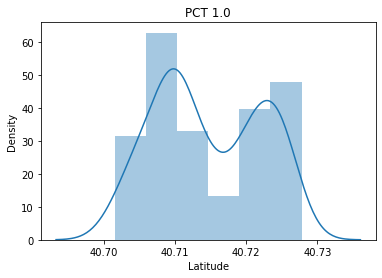

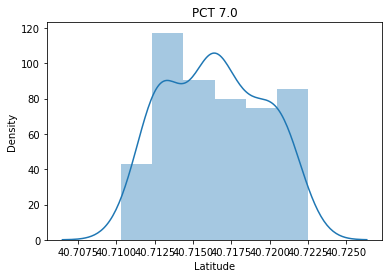

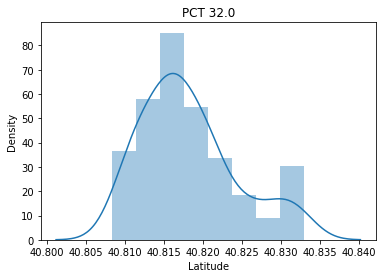

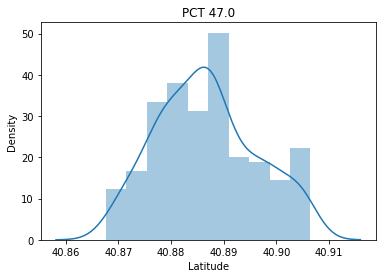

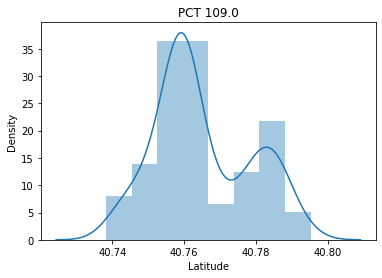

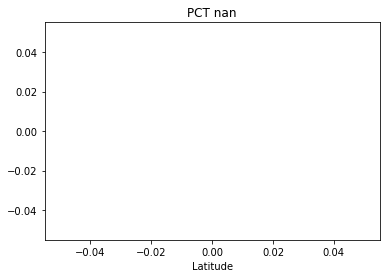

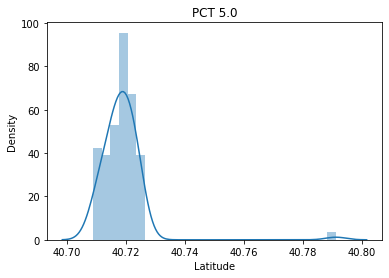

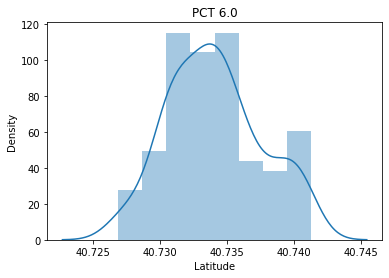

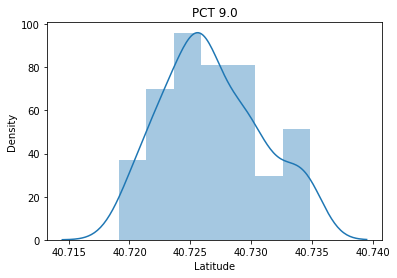

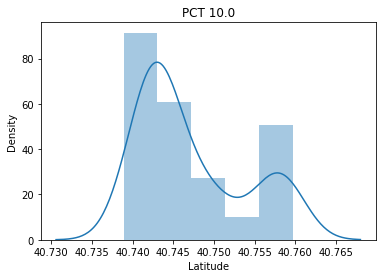

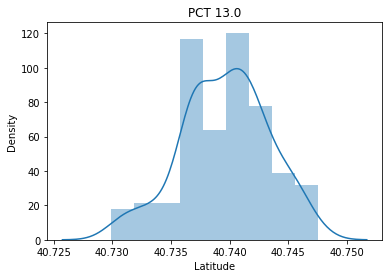

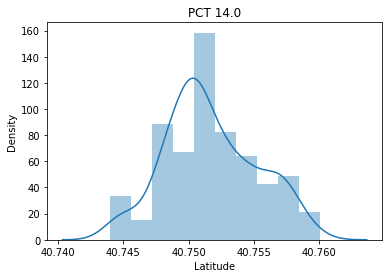

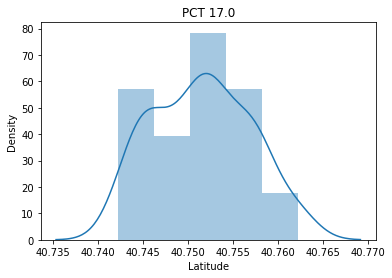

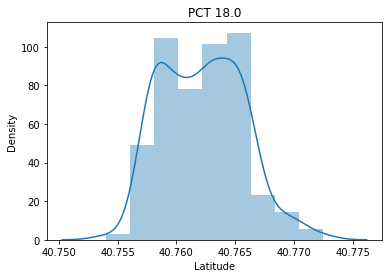

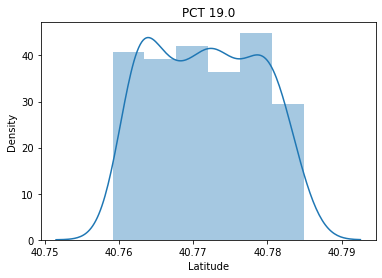

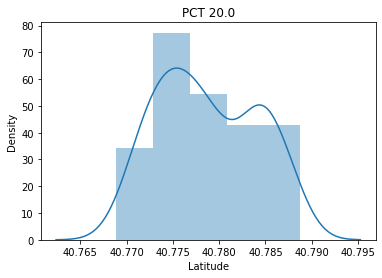

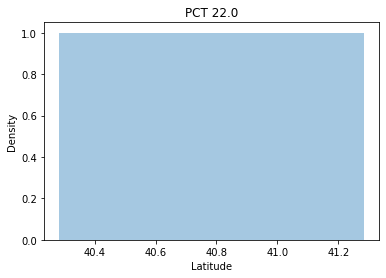

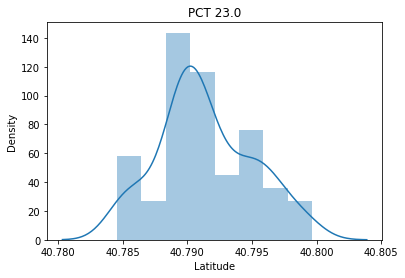

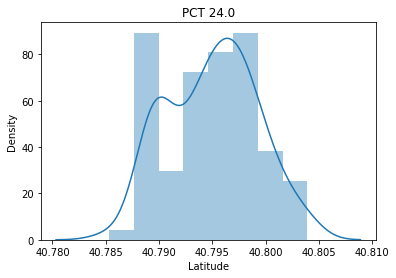

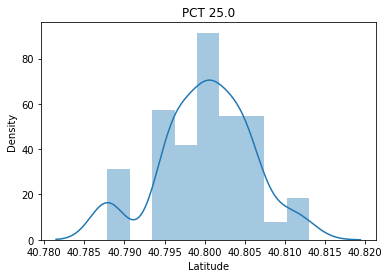

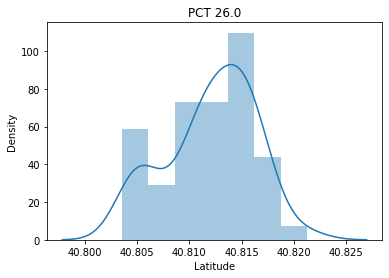

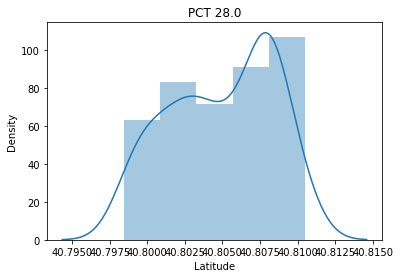

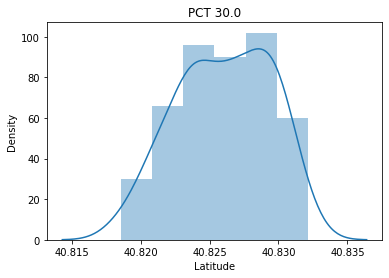

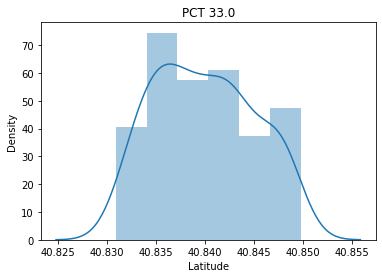

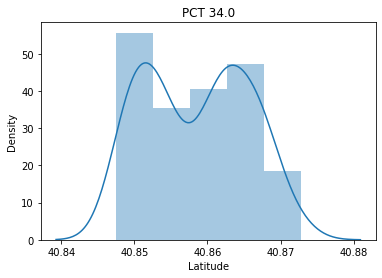

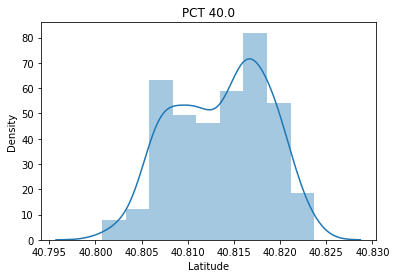

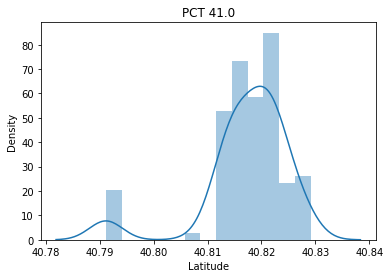

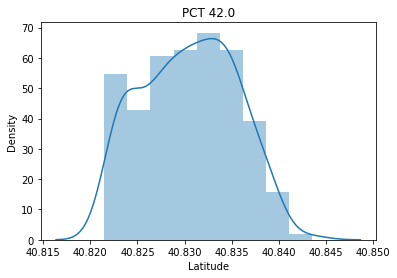

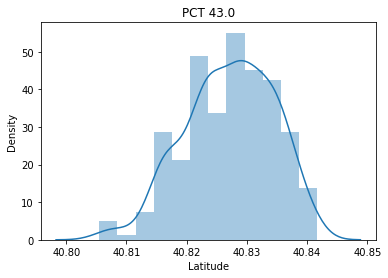

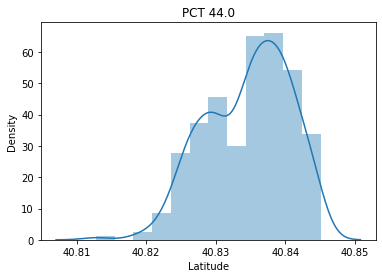

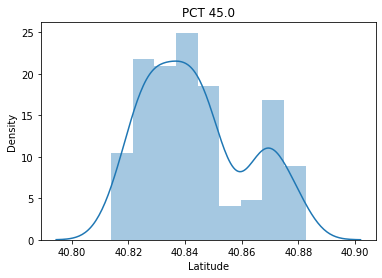

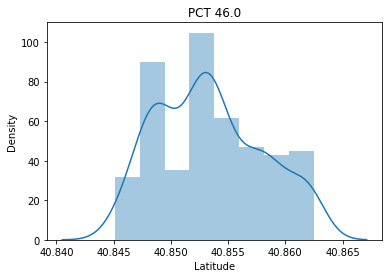

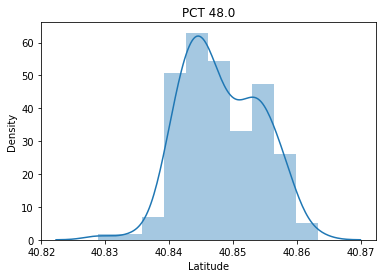

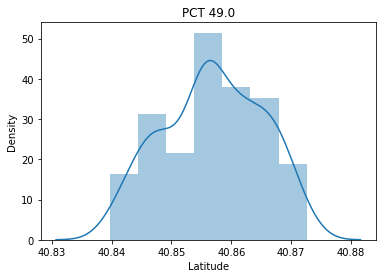

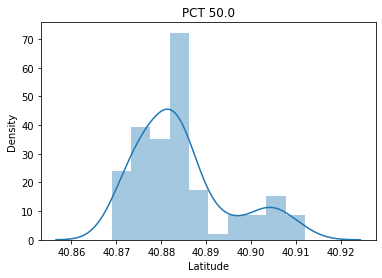

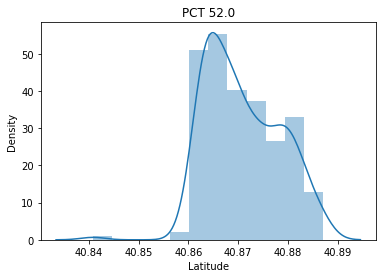

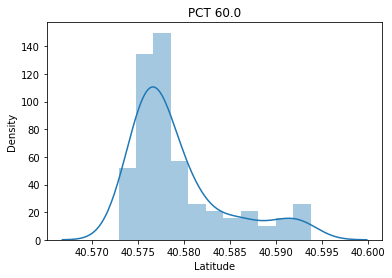

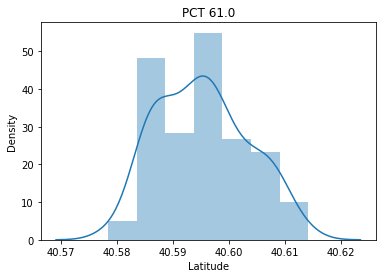

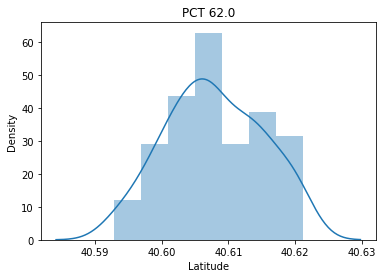

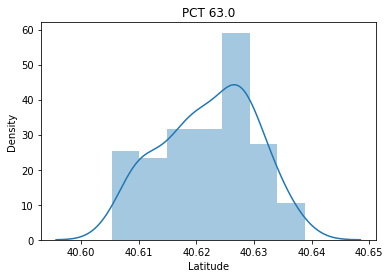

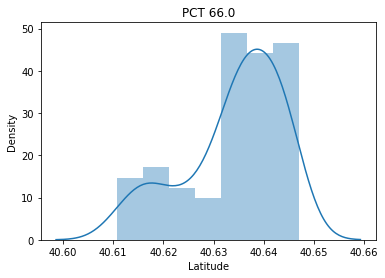

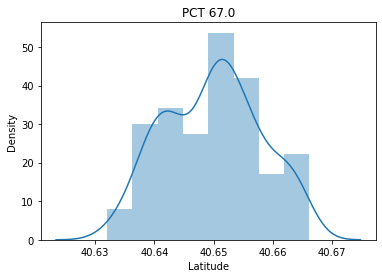

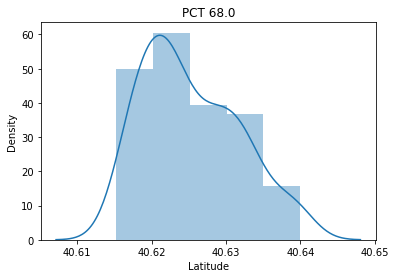

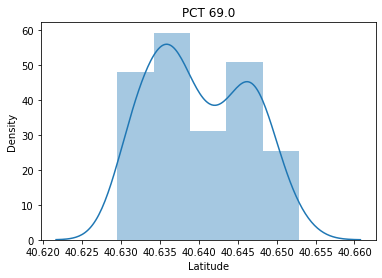

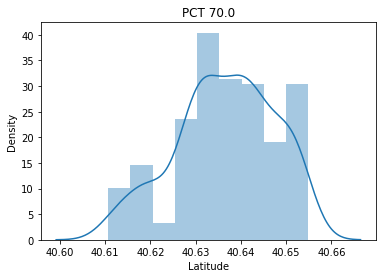

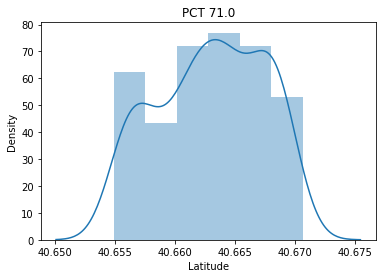

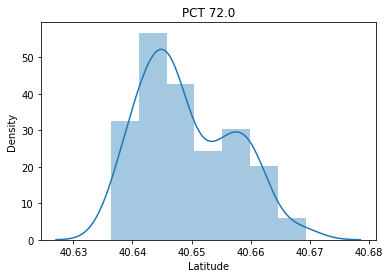

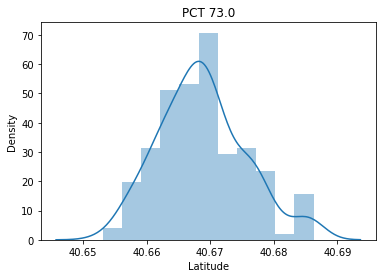

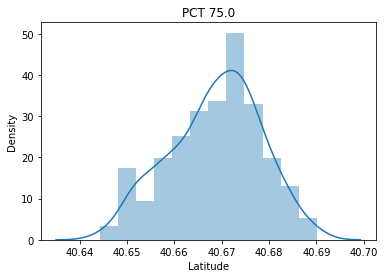

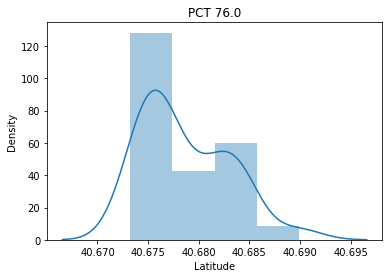

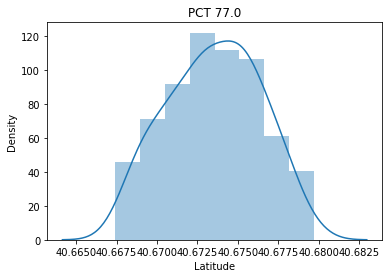

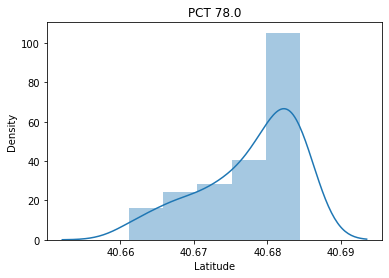

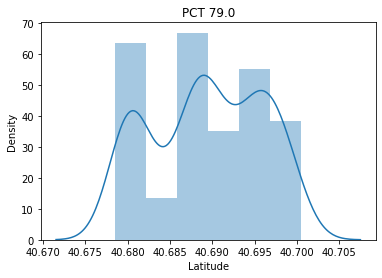

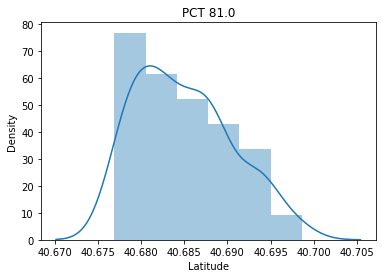

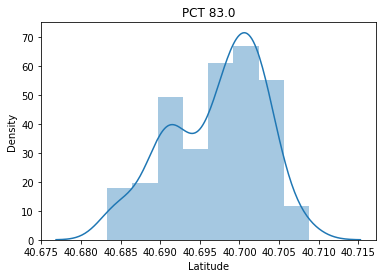

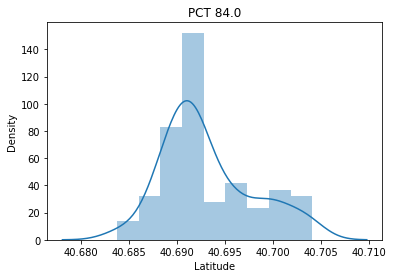

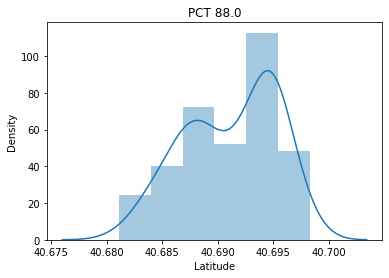

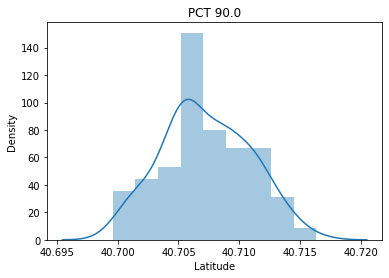

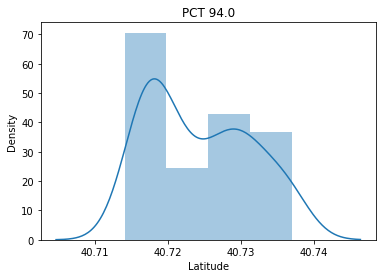

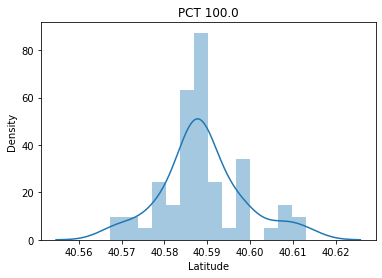

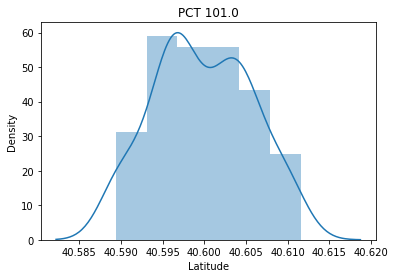

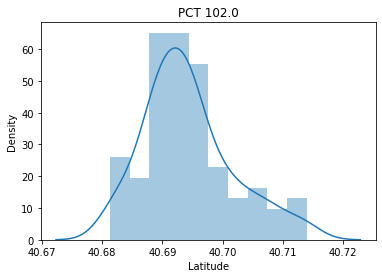

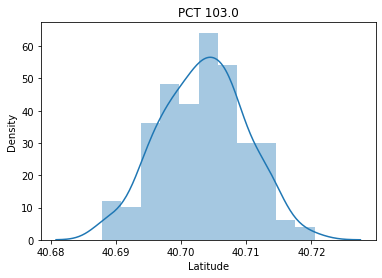

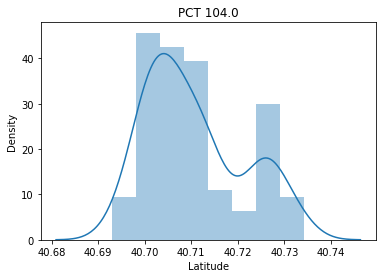

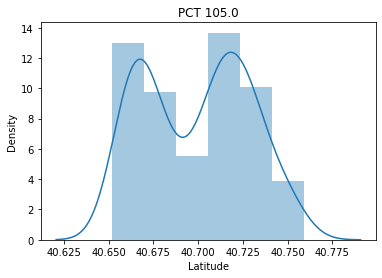

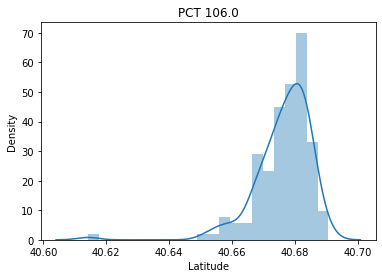

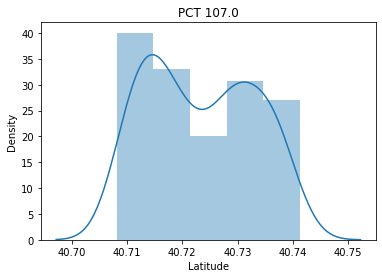

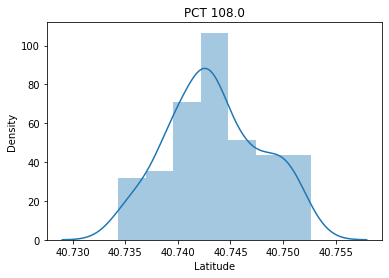

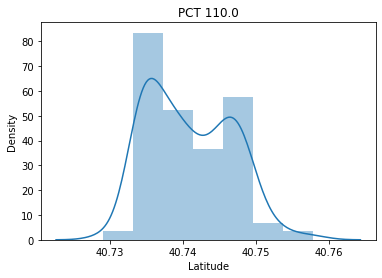

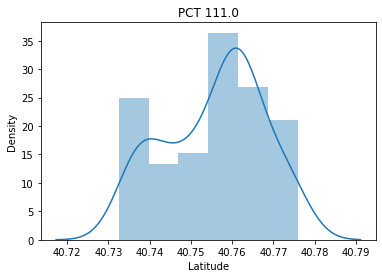

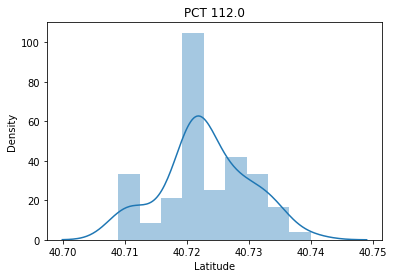

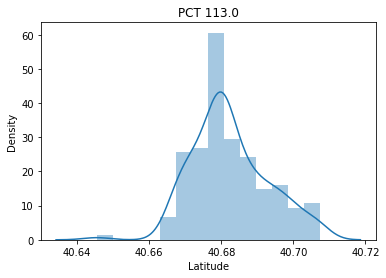

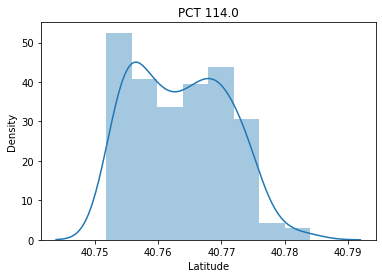

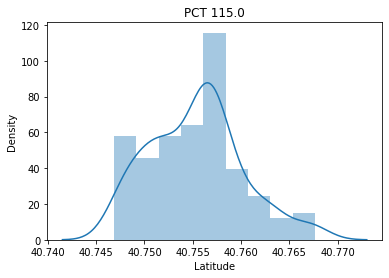

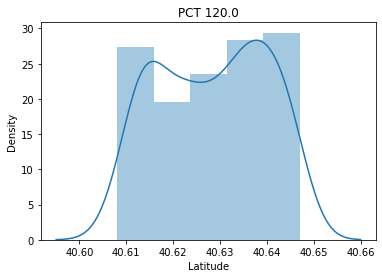

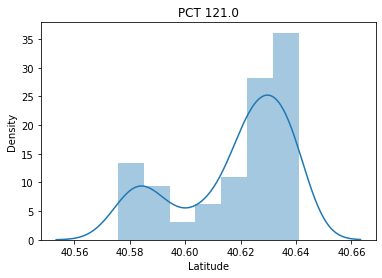

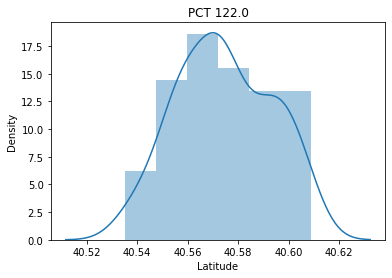

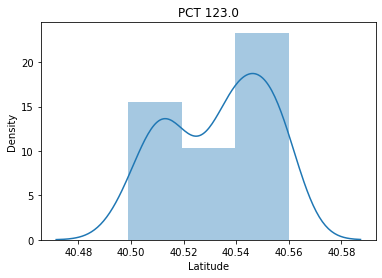

In [27]:
# df_c.groupby('ADDR_PCT_CD').apply(lambda x: x['Latitude'])
for i in sorted(df_c['ADDR_PCT_CD'].unique()):
    plt.figure()
    sns.distplot(df_c[df_c['ADDR_PCT_CD'] == i]['Latitude'])
    plt.title(f'PCT {i}')

# sns.boxplot(df=df_c, x='ADDR_PCT_CD', y='Latitude')

In [9]:
df.isna().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1744294
CMPLNT_TO_TM         1739479
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18832
PD_CD                   6761
PD_DESC                 6761
CRM_ATPT_CPTD_CD         168
LAW_CAT_CD                 0
BORO_NM                12480
LOC_OF_OCCUR_DESC    1618063
PREM_TYP_DESC          42015
JURIS_DESC                 0
JURISDICTION_CODE       6761
PARKS_NM             7794644
HADEVELOPT           7477110
HOUSING_PSA          7226206
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4883369
SUSP_RACE            3514828
SUSP_SEX             3648142
TRANSIT_DISTRICT     7653024
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             7218
STATION_NAME         7653024
VIC_AGE_GROUP        1638445
VIC_RACE                 390
VIC_SEX       